# Pandas - Muhammad Qasim - 09/01/2021

# Data Wargling (Join)


# Handling Missing Values

In [1]:
# => (inner, outer, left, right)
# => df.join()
# => df.merge()
# => pd.concat()

# Group by
# => df.groupby(by)
# => unstact
# => pivot_Table

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=20),
                   "Account No":np.random.randint(1,5, size=(20))})
display(df1)
df1.drop_duplicates(inplace=True)
df1

,CNIC,Account No
0,3,1
1,17,1
2,18,3
3,15,2
4,12,3
5,12,3
6,15,3
7,1,3
8,1,2
9,18,4


,CNIC,Account No
0,3,1
1,17,1
2,18,3
3,15,2
4,12,3
6,15,3
7,1,3
8,1,2
9,18,4
10,5,3


In [4]:
df2 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=(20)),
                   "Account No":np.random.randint(1,5, size=(20)),
                   "Mobile No":np.random.randint(2001,3000, size=(20)),
                  "DOB":pd.date_range('1990-01-01', periods=20, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(20))],
                   "Gender":np.random.choice(["M","F"], size=(20))})
df2

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,12,1,2021,1990-01-31,K,M
1,10,4,2743,1990-02-28,Y,F
2,10,3,2132,1990-03-31,G,M
3,9,4,2564,1990-04-30,T,M
4,11,4,2575,1990-05-31,Z,F
5,11,2,2609,1990-06-30,R,F
6,7,4,2268,1990-07-31,F,M
7,5,3,2930,1990-08-31,X,F
8,10,3,2549,1990-09-30,Q,F
9,10,4,2248,1990-10-31,V,M


In [5]:
df2.columns[np.in1d(df2.columns,df1.columns)]

Index(['CNIC', 'Account No'], dtype='object')

In [6]:
df2[df2.CNIC==4]

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender


In [7]:
print(df1.dtypes, df2.dtypes, sep="\n\n\n")

CNIC          int32
Account No    int32
dtype: object


CNIC                     int32
Account No               int32
Mobile No                int32
DOB             datetime64[ns]
CustomerName            object
Gender                  object
dtype: object


In [8]:
# columnNameSameInBothDataframes
# Name(optional), datatype, data_pattern

#data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")
#typeofJoin=inner,outer,left,right

#data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

#data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

#if columns name differents in both table 

#data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

#data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')



data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")

In [9]:
a = df1.merge(df2, on="CNIC", how='inner')
print(len(df1))
print(len(df2))
print(len(a))
a

18
20
20


,CNIC,Account No_x,Account No_y,Mobile No,DOB,CustomerName,Gender
0,15,2,3,2814,1991-01-31,S,F
1,15,3,3,2814,1991-01-31,S,F
2,12,3,1,2021,1990-01-31,K,M
3,12,2,1,2021,1990-01-31,K,M
4,5,3,3,2930,1990-08-31,X,F
5,5,3,3,2163,1991-04-30,A,F
6,5,1,3,2930,1990-08-31,X,F
7,5,1,3,2163,1991-04-30,A,F
8,14,2,4,2431,1990-11-30,T,M
9,10,3,4,2743,1990-02-28,Y,F


### data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

In [10]:
a = df1.merge(df2, on=["CNIC","Account No"], how="inner") #Join with multiples columns
print(len(df1))
print(len(df2))
print(len(a))
a

18
20
8


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,15,3,2814,1991-01-31,S,F
1,5,3,2930,1990-08-31,X,F
2,5,3,2163,1991-04-30,A,F
3,10,3,2132,1990-03-31,G,M
4,10,3,2549,1990-09-30,Q,F
5,10,4,2743,1990-02-28,Y,F
6,10,4,2248,1990-10-31,V,M
7,8,3,2683,1991-02-28,O,F


##### data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

In [11]:
df1.columns

Index(['CNIC', 'Account No'], dtype='object')

In [12]:
df1.columns = ['Customer CNIC', 'Customer Account No']
df1.head(2)

,Customer CNIC,Customer Account No
0,3,1
1,17,1


In [13]:
df2.head(2)

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,12,1,2021,1990-01-31,K,M
1,10,4,2743,1990-02-28,Y,F


In [14]:
a = df1.merge(df2, left_on="Customer CNIC", right_on="CNIC")
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,15,2,15,3,2814,1991-01-31,S,F
1,15,3,15,3,2814,1991-01-31,S,F
2,12,3,12,1,2021,1990-01-31,K,M
3,12,2,12,1,2021,1990-01-31,K,M
4,5,3,5,3,2930,1990-08-31,X,F
5,5,3,5,3,2163,1991-04-30,A,F
6,5,1,5,3,2930,1990-08-31,X,F
7,5,1,5,3,2163,1991-04-30,A,F
8,14,2,14,4,2431,1990-11-30,T,M
9,10,3,10,4,2743,1990-02-28,Y,F


In [15]:
a = df1.merge(df2, left_on=["Customer CNIC","Customer Account No"], right_on=["CNIC","Account No"])
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,15,3,15,3,2814,1991-01-31,S,F
1,5,3,5,3,2930,1990-08-31,X,F
2,5,3,5,3,2163,1991-04-30,A,F
3,10,3,10,3,2132,1990-03-31,G,M
4,10,3,10,3,2549,1990-09-30,Q,F
5,10,4,10,4,2743,1990-02-28,Y,F
6,10,4,10,4,2248,1990-10-31,V,M
7,8,3,8,3,2683,1991-02-28,O,F


In [16]:
a[["CNIC","CustomerName","Mobile No"]]

,CNIC,CustomerName,Mobile No
0,15,S,2814
1,5,X,2930
2,5,A,2163
3,10,G,2132
4,10,Q,2549
5,10,Y,2743
6,10,V,2248
7,8,O,2683


##### data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')


In [17]:
customers = pd.DataFrame({"Customers NIC": [14,6,19,22],"Customer Name":["A","B","C","D"]})


transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20))})


customers

,Customers NIC,Customer Name
0,14,A
1,6,B
2,19,C
3,22,D


In [18]:
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount
0,19,1,1990-01-31,IBFT,500555
1,6,1,1990-02-28,TopUP,883796
2,14,1,1990-03-31,TopUP,229831
3,6,1,1990-04-30,TopUP,969393
4,14,1,1990-05-31,FT,808306
5,19,1,1990-06-30,FT,694380
6,19,1,1990-07-31,FT,899139
7,19,1,1990-08-31,FT,841161
8,21,1,1990-09-30,IBFT,939812
9,14,1,1990-10-31,IBFT,455203


In [19]:
def fee_charges(x):
  if x>=1 and x<=100000:
    return 10
  elif x>100000 and x<=1000000:
    return 50
  else:
    return 100

transactions['fee'] = transactions.Amount.apply(fee_charges)
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,19,1,1990-01-31,IBFT,500555,50
1,6,1,1990-02-28,TopUP,883796,50
2,14,1,1990-03-31,TopUP,229831,50
3,6,1,1990-04-30,TopUP,969393,50
4,14,1,1990-05-31,FT,808306,50
5,19,1,1990-06-30,FT,694380,50
6,19,1,1990-07-31,FT,899139,50
7,19,1,1990-08-31,FT,841161,50
8,21,1,1990-09-30,IBFT,939812,50
9,14,1,1990-10-31,IBFT,455203,50


In [20]:
c = transactions.CNIC.value_counts()
print(c.index)
print(c.values)
print()
print(c)

Int64Index([14, 6, 21, 19], dtype='int64')
[6 5 5 4]

14    6
6     5
21    5
19    4
Name: CNIC, dtype: int64


In [21]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='left')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a.sort_values(by=["Transaction counts"], ascending=False, inplace=True)
a

,Customers NIC,Customer Name,Transaction counts
0,14,A,6.0
1,6,B,5.0
2,19,C,4.0
3,22,D,NaN


In [22]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='right')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a.sort_values(by=["Transaction counts"], ascending=False, inplace=True)
a

,Customers NIC,Customer Name,Transaction counts
0.0,14,A,6
1.0,6,B,5
NaN,21,NaN,5
2.0,19,C,4


In [23]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='inner')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0,14,A,6
1,6,B,5
2,19,C,4


In [24]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='outer')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0.0,14,A,6.0
1.0,6,B,5.0
2.0,19,C,4.0
3.0,22,D,NaN
NaN,21,NaN,5.0


# Slabs
* pd.cut(series)
* pd.qcut(series)

In [25]:
transactions.head(2)

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,19,1,1990-01-31,IBFT,500555,50
1,6,1,1990-02-28,TopUP,883796,50


In [26]:
slabs = [1,10000,50000,100000,500000,99000000]
pd.cut(transactions.Amount,slabs).value_counts()

(500000, 99000000]    11
(100000, 500000]       7
(50000, 100000]        2
(1, 10000]             0
(10000, 50000]         0
Name: Amount, dtype: int64

In [27]:
slabs = [0, 0.6, 0.8, .95, 1]
pd.qcut(transactions.Amount,slabs).value_counts()

(58229.999, 807856.6]    12
(807856.6, 906371.0]      4
(906371.0, 969837.55]     3
(969837.55, 978284.0]     1
Name: Amount, dtype: int64

# Group by

In [28]:
#dataframeName.groupby("Col").agg([count])             optional(min,max,avg,sum, std)(int,float)
#dataframeName.groupby(by="Col")[["colname"]].agg([count]) 
#dataframeName.groupby(by=[col1,col2,..]).agg([count]) 

In [29]:
transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(20))})
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,14,1,1990-01-31,IBFT,256414,Islamabad
1,21,1,1990-02-28,IBFT,827607,Islamabad
2,6,1,1990-03-31,TopUP,308105,Karachi
3,19,1,1990-04-30,IBFT,422653,Islamabad
4,21,1,1990-05-31,IBFT,181272,Karachi
5,19,1,1990-06-30,IBFT,118922,Lahore
6,6,1,1990-07-31,IBFT,534885,Lahore
7,19,1,1990-08-31,FT,8786,Lahore
8,19,1,1990-09-30,FT,916404,Islamabad
9,19,1,1990-10-31,IBFT,833229,Lahore


In [30]:
a = transactions.groupby("City").agg(['count'])
a

,CNIC,TransactionID,Transaction Date,Description,Amount
,count,count,count,count,count
City,,,,,
Islamabad,9,9,9,9,9
Karachi,7,7,7,7,7
Lahore,4,4,4,4,4


In [31]:
a = transactions.groupby("City")[["CNIC"]].agg(['count'])
a

,CNIC
,count
City,
Islamabad,9
Karachi,7
Lahore,4


In [32]:
a = transactions.groupby("City")[["City"]].agg(['count'])
a

,City
,count
City,
Islamabad,9
Karachi,7
Lahore,4


In [33]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std])
a

count     min     max           mean            std
City      Description                                                     
Islamabad FT               4  121264  916404  406282.250000  366386.306206
          IBFT             5   49304  827607  434560.200000  303317.368807
Karachi   FT               2  230742  903934  567338.000000  476018.628241
          IBFT             3  181272  597825  336712.333333  227495.235063
          TopUP            2  308105  329226  318665.500000   14934.802325
Lahore    FT               1    8786    8786    8786.000000            NaN
          IBFT             3  118922  833229  495678.666667  358763.815054

In [34]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std,'sum']).reset_index()
a = a.sort_values(by=["City",'count'], ascending=[True,False])
# a.to_excel("output.xlsx", index=False)
a

,City,Description,count,min,max,mean,std,sum
1,Islamabad,IBFT,5,49304,827607,434560.200000,303317.368807,2172801
0,Islamabad,FT,4,121264,916404,406282.250000,366386.306206,1625129
3,Karachi,IBFT,3,181272,597825,336712.333333,227495.235063,1010137
2,Karachi,FT,2,230742,903934,567338.000000,476018.628241,1134676
4,Karachi,TopUP,2,308105,329226,318665.500000,14934.802325,637331
6,Lahore,IBFT,3,118922,833229,495678.666667,358763.815054,1487036
5,Lahore,FT,1,8786,8786,8786.000000,NaN,8786


In [35]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std]).unstack()
a

count                  min                           max  \
Description    FT IBFT TopUP        FT      IBFT     TopUP        FT   
City                                                                   
Islamabad     4.0  5.0   NaN  121264.0   49304.0       NaN  916404.0   
Karachi       2.0  3.0   2.0  230742.0  181272.0  308105.0  903934.0   
Lahore        1.0  3.0   NaN    8786.0  118922.0       NaN    8786.0   

                                      mean                           \
Description      IBFT     TopUP         FT           IBFT     TopUP   
City                                                                  
Islamabad    827607.0       NaN  406282.25  434560.200000       NaN   
Karachi      597825.0  329226.0  567338.00  336712.333333  318665.5   
Lahore       833229.0       NaN    8786.00  495678.666667       NaN   

                       std                               
Description             FT           IBFT         TopUP  
City                                                     
Islamabad    366386.306206  303317.368807           NaN  
Karachi      476018.628241  227495.235063  14934.802325  
Lahore                 NaN  358763.815054           NaN

Categorical data/nominal data
'orange','mango'


ordinal data
1,3,2,4 (discreate/countinues)
A,B,C
a,b,c
i,ii,iii

In [36]:
a = input("Enter no")
a.split(",")

['1 2 3 4 5']

In [37]:
list(str('232'))

['2', '3', '2']

In [38]:
transactions.groupby([transactions['Transaction Date'].dt.year, "City","CNIC"]).agg(['count'])

TransactionID Transaction Date Description  \
                                        count            count       count   
Transaction Date City      CNIC                                              
1990             Islamabad 14               1                1           1   
                           19               3                3           3   
                           21               1                1           1   
                 Karachi   6                1                1           1   
                           14               1                1           1   
                           21               1                1           1   
                 Lahore    6                1                1           1   
                           19               3                3           3   
1991             Islamabad 14               3                3           3   
                           21               1                1           1   
                 Karachi   6                2                2           2   
                           14               1                1           1   
                           19               1                1           1   

                                Amount  
                                 count  
Transaction Date City      CNIC         
1990             Islamabad 14        1  
                           19        3  
                           21        1  
                 Karachi   6         1  
                           14        1  
                           21        1  
                 Lahore    6         1  
                           19        3  
1991             Islamabad 14        3  
                           21        1  
                 Karachi   6         2  
                           14        1  
                           19        1

In [39]:
transactions.head()

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,14,1,1990-01-31,IBFT,256414,Islamabad
1,21,1,1990-02-28,IBFT,827607,Islamabad
2,6,1,1990-03-31,TopUP,308105,Karachi
3,19,1,1990-04-30,IBFT,422653,Islamabad
4,21,1,1990-05-31,IBFT,181272,Karachi


count           
Description    FT IBFT TopUP
City                        
Islamabad     4.0  5.0   NaN
Karachi       2.0  3.0   2.0
Lahore        1.0  3.0   NaN

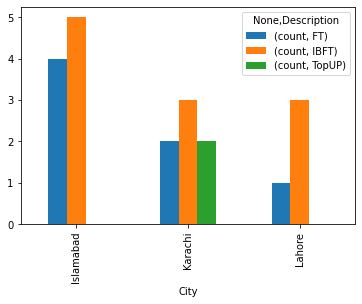

In [40]:
a = transactions.groupby(["City","Description"]).TransactionID.agg(['count']).unstack()

a.plot(kind='bar')
a

In [41]:
b = transactions.pivot_table(index="City", columns="Description", aggfunc=["count",'sum'])
b

count                                                         \
            Amount            CNIC            Transaction Date              
Description     FT IBFT TopUP   FT IBFT TopUP               FT IBFT TopUP   
City                                                                        
Islamabad      4.0  5.0   NaN  4.0  5.0   NaN              4.0  5.0   NaN   
Karachi        2.0  3.0   2.0  2.0  3.0   2.0              2.0  3.0   2.0   
Lahore         1.0  3.0   NaN  1.0  3.0   NaN              1.0  3.0   NaN   

                           ...              sum                             \
            TransactionID  ...           Amount                       CNIC   
Description            FT  ... TopUP         FT       IBFT     TopUP    FT   
City                       ...                                               
Islamabad             4.0  ...   NaN  1625129.0  2172801.0       NaN  61.0   
Karachi               2.0  ...   2.0  1134676.0  1010137.0  637331.0  33.0   
Lahore                1.0  ...   NaN     8786.0  1487036.0       NaN  19.0   

                                                  
                        TransactionID             
Description  IBFT TopUP            FT IBFT TopUP  
City                                              
Islamabad    94.0   NaN           4.0  5.0   NaN  
Karachi      41.0  12.0           2.0  3.0   2.0  
Lahore       44.0   NaN           1.0  3.0   NaN  

[3 rows x 21 columns]